# SECURITY ALERT SYSTEM
### By Samuel Waweru, B.Sc.Mechatronic Engineering, JKUAT 2025

## Machine Learning Model

In [28]:
import tweepy
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#from wordcloud import WordCloud
import nltk
from nltk.tokenize.toktok import *
tokenizer = ToktokTokenizer()
from nltk.corpus import stopwords

nltk.download("stopwords")
CONSUMER_KEY = "****************"
CONSUMER_SECRET = "*************************" 
ACCESS_TOKEN = "**************************************"
ACCESS_TOKEN_SECRET = "*************************************"

# Authenticate to Twitter
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
api = tweepy.API(auth, wait_on_rate_limit=True)

loc = "-0.0236,37.9062,100km"

# Search dates
date_since = "2022-01-23"
date_until = "2022-01-17"
search_words_2 = "theives OR pickpocket OR killer OR murderer OR suspect OR rape OR mugging OR convict OR misdemeanor OR riot OR fracas "
# We also want to exclude retweets and replies as this may sway results
my_search = search_words_2 + " -filter:retweets" + " -filter:replies"
# for i,tweet in enumerate(df['tweet_text'].head(20)):
# print(i+1, tweet, '\n')

# Use the tweepy Cursor method to access tweets from a specified region and between certain dates
#tweets = tweepy.Cursor(api.search_tweets, q=my_search,lang="en",tweet_mode='extended', count=100,geocode=loc,since=date_since,since_id=0,until=date_until).items()

tweets= tweepy.Cursor(api.search, q=my_search, count=100,tweet_mode='extended', geocode=loc,lang="en",since_id=0).items(1000)


tweet_info = [[tweet.id_str, tweet.created_at, tweet.user.location, tweet.full_text] for tweet in tweets]

# Put our data into a dataframe
df = pd.DataFrame(data=tweet_info, columns=['tweet_id_str', 'date_time', 'location', 'tweet_text'])
df


,tweet_id_str,date_time,location,tweet_text
0,1485230104288636934,2022-01-23 12:37:05,"Eldoret, Kenya",To have the skills required in order to make k...
1,1485199237101105155,2022-01-23 10:34:26,"Nakuru, Kenya","""This is a mugging"" https://t.co/6vFQd6mMXv"
2,1485000887495974917,2022-01-22 21:26:16,Nakuru,"19 year olds verified on Tinder , very suspect..."
3,1484941681246023686,2022-01-22 17:31:00,Kianyaga town,#ReggaeBoyzOnNRG\nBounty bounty killer\n#regga...
4,1484815335421366275,2022-01-22 09:08:57,"Kakamega, Kenya","The rate at which we're loosing \nyoung lives,..."
5,1484765458460987396,2022-01-22 05:50:45,"Tororo, Uganda",Pompi Giant killer lyrics
6,1484564365089124358,2022-01-21 16:31:41,"Tororo, Uganda",Pompi Giant killer lyrics
7,1484469132070469636,2022-01-21 10:13:15,"Nakuru, Kenya",Athletes and gang rape in one whatsaap group.
8,1484465278679502848,2022-01-21 09:57:57,"Nakuru, Kenya",Let's speak up as we help to manage this kille...
9,1484364621938970625,2022-01-21 03:17:58,"Eldoret, Kenya",Ichi the Killer - (2001). Check trailer and wh...


In [47]:
def clean_text(text):
    
    """
    A function to clean the tweet text
    """
    #Remove hyper links
    text = re.sub(r'https?:\/\/\S+', ' ', text)
    
    #Remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    
    #Remove anything that isn't a letter, number, or one of the punctuation marks listed
    text = re.sub(r"[^A-Za-z0-9#'?!,.]+", ' ', text)   
    
    return text

# Apply the clean_text function to the 'tweet_text' column
df['tweet_text']=df['tweet_text'].apply(clean_text)

In [48]:
# Apply the clean_text function to the 'tweet_text' column
df['tweet_text']=df['tweet_text'].apply(clean_text)
df['tweet_text']=df['tweet_text'].str.lower()
stopwords = stopwords.words("english")
# Define our own list of stopwords
my_stopwords = ['coronavirus','covid','pandemic','covid19','lockdown','amp','via']

# Extend the nltk stopwords list
stopwords.extend(my_stopwords)
def remove_stopwords(text):
    
    """
    A function to remove stop words
    """
    
    # Tokenize the text
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    
    return filtered_text

# Apply the stopword removal function to the text of all tweets
df['tweet_text']=df['tweet_text'].apply(remove_stopwords)


In [49]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

#Creating Tokenizer
tokenizing=AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
#Voting in the model
model=AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

def sentiment_score(review):
    token = tokenizing.encode(review, return_tensors='pt')
    result = model(token)
    return int(torch.argmax(result.logits))+1

x = df["tweet_text"].iloc[1]
print (x)


mugging


In [50]:
df['sentiment'] = df['tweet_text'].apply(lambda x: sentiment_score(x[:512]))
df.head(10)


,tweet_id_str,date_time,location,tweet_text,sentiment
0,1485230104288636934,2022-01-23 12:37:05,"Eldoret, Kenya","skills required order make killer music , must...",5
1,1485199237101105155,2022-01-23 10:34:26,"Nakuru, Kenya",mugging,2
2,1485000887495974917,2022-01-22 21:26:16,Nakuru,"19 year olds verified tinder , suspect ask",1
3,1484941681246023686,2022-01-22 17:31:00,Kianyaga town,#reggaeboyzonnrg bounty bounty killer #reggaeb...,1
4,1484815335421366275,2022-01-22 09:08:57,"Kakamega, Kenya","rate ' loosing young lives , saddened suicides...",1
5,1484765458460987396,2022-01-22 05:50:45,"Tororo, Uganda",pompi giant killer lyrics,1
6,1484564365089124358,2022-01-21 16:31:41,"Tororo, Uganda",pompi giant killer lyrics,1
7,1484469132070469636,2022-01-21 10:13:15,"Nakuru, Kenya",athletes gang rape one whatsaap group .,1
8,1484465278679502848,2022-01-21 09:57:57,"Nakuru, Kenya",let ' speak help manage killer disease depression,4
9,1484364621938970625,2022-01-21 03:17:58,"Eldoret, Kenya",ichi killer 2001 . check trailer need know #na...,5


In [51]:
print(df.groupby(['sentiment'])['sentiment'].count())

sentiment
1    39
2     3
4     1
5     4
Name: sentiment, dtype: int64


C:\Users\hp\AppData\Local\Temp/ipykernel_19748/1822517172.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


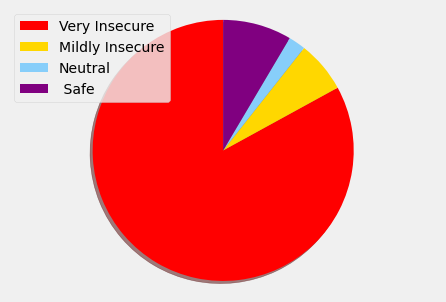

In [54]:
fig= plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Very Insecure', 'Mildly Insecure', 'Neutral',' Safe ']
sizes = [39, 3, 1,4]
colors = ['Red', 'gold', 'lightskyblue', 'Purple']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

## Elarian Framework

In [15]:

import asyncio
from elarian import Elarian, Customer

client = Elarian(org_id='********************', app_id='***********', api_key='*********************************')

async def on_connected():
    print("App is running!")

    alice = Customer(client=client, number="+254712345678", provider="cellular")

    telegram_channel = {
    'number': 'SECURITY-ALERT BOT',
    'channel': 'telegram'
    }

    await alice.send_message(telegram_channel, { 'body': { 'text': 'ALERT!' }})
    
async def on_received_telegram(notification, customer):
    print("Received telegram notification!")

async def start():
    client.set_on_connection_error(lambda err: print(f"Connnection error: {err}"))
    client.set_on_connected(on_connected)
    client.set_on_received_telegram(on_received_telegram)
    await client.connect()

if __name__ == "__main__":
    loop = asyncio.get_event_loop()
    loop.create_task(start())
    loop.run_forever()

RuntimeError: This event loop is already running

App is running!
No handler for notification: {'message_id': 'el_evt_8456ad6a-98e1-493a-842b-06f46930161d', 'status': 'DELIVERED', 'org_id': 'el_org_eu_VX3uBP', 'app_id': 'el_app_xCMQ0o', 'customer_id': 'el_cst_2ab0aafbdf7fe8a245a0615eb70b9ea6', 'created_at': '2022-01-23T12:46:56.317337Z'}
